<a href="https://colab.research.google.com/github/joshiayush/ai/blob/master/ai/projects/data-science/digits-classifier/digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading and Visualizing the digits data

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels. Let's visualize the first hundereds of these:

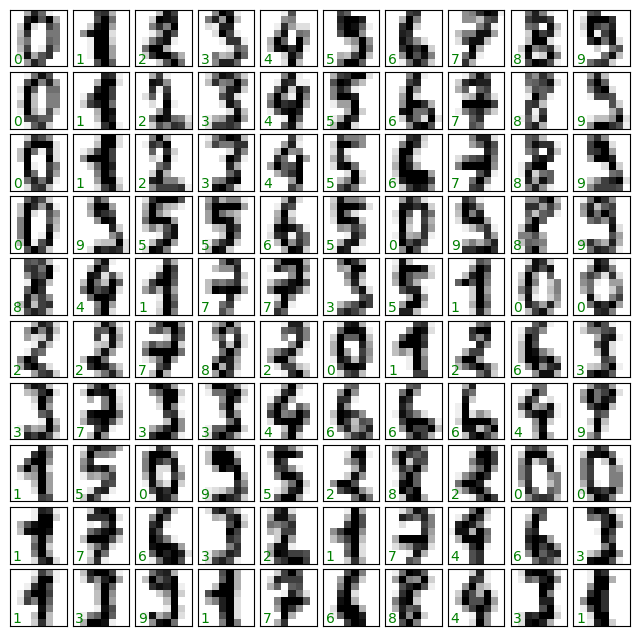

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes,
          color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation. We can accomplish this by treating each pixel in the image as a feature—that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the `data` and `target` attributes, respectively:

In [9]:
X = digits.data
Y = digits.target

In [11]:
X.shape, Y.shape

((1797, 64), (1797,))

Alternatively, to get `X` from `data.images` you can use the following method in which we reshape the array to flatten the pixel data:

In [13]:
# digits.images.reshape(X.shape)
#
# To confirm if we got the required matrix:
# digits.images.reshape(X.shape) == X

#### Unsupervised learning: Dimensionality reduction

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll reduce the dimensions to 2, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap and transform the data into two dimensions:

In [14]:
from sklearn.manifold import Isomap

In [16]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [17]:
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional. Let’s plot this data to see if we can learn anything from its structure

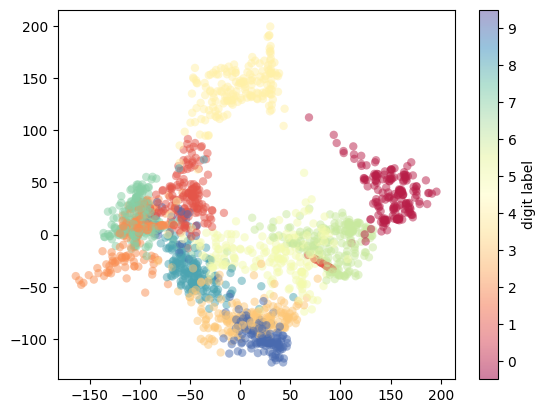

In [25]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap='Spectral')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated
in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple)
have very little overlap in parameter space. Intuitively, this makes sense: a zero is
empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between
ones and fours: we can understand this by realizing that some people draw ones with
“hats” on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the param‐
eter space: this tells us that even a very straightforward supervised classification algo‐
rithm should perform suitably on this data. Let’s give it a try.

#### Classification on Digits

 we
will split the data into a training and test set, and fit a Gaussian naive Bayes model:

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)

In [28]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the
true values of the test set to the predictions:

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(ytest, y_pred)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification
of the digits! However, this single number doesn’t tell us where we’ve gone wrong—
one nice way to do this is to use the confusion matrix, which we can compute with
Scikit-Learn and plot with Seaborn

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
mat = confusion_matrix(ytest, y_pred)

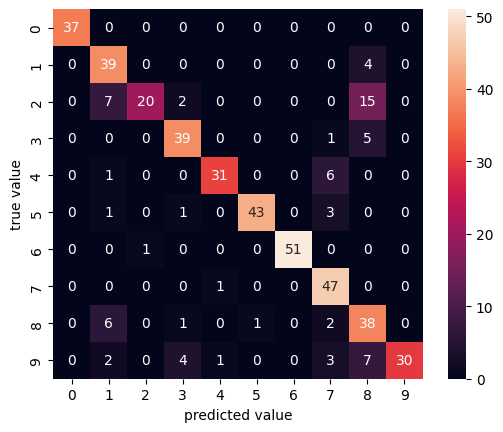

In [37]:
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mislabeled points tend to be: for example, a large number of
twos here are misclassified as either ones or eights. Another way to gain intuition into
the characteristics of the model is to plot the inputs again, with their predicted labels.
We’ll use green for correct labels, and red for incorrect labels

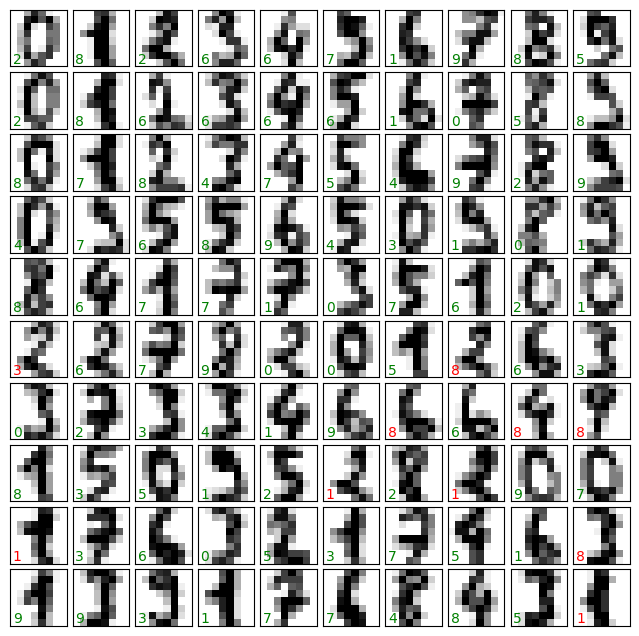

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_pred[i]),
          transform=ax.transAxes,
          color='green' if (ytest[i] == y_pred[i]) else 'red')